In [170]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%load_ext autoreload
%autoreload 2



apple = pd.read_csv('AAPL.csv')
amazon = pd.read_csv('AMZN.csv')
google = pd.read_csv("GOOG.csv")
facebook = pd.read_csv("FB.csv")
microsoft = pd.read_csv("MSFT.csv")
"""
New Question: Can we predict to see what the direction will the prices go the next day
"""
apple

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Date,Open,High,Low,Close,Volume
0,2023-03-24,158.860000,160.340000,157.850000,160.250000,5.925634e+07
1,2023-03-23,158.830000,161.550100,157.680000,158.930000,6.762206e+07
2,2023-03-22,159.300000,162.140000,157.810000,157.830000,7.570181e+07
3,2023-03-21,157.320000,159.400000,156.540000,159.280000,7.393828e+07
4,2023-03-20,155.070000,157.820000,154.150000,157.400000,7.364142e+07
...,...,...,...,...,...,...
9710,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08
9711,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
9712,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
9713,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07


In [171]:
apple_df = apple[::-1].reset_index(drop = True)
#apple_df["Close"].iloc[0]
apple_df["Tomorrow"] = apple_df["Close"].shift(-1)
apple_df["Target"] = (apple_df["Tomorrow"] > apple_df["Close"]).astype(int)
apple_df = apple_df.loc["1990-01-01":].copy()
    


In [172]:
"""
Creating the models through functions that way I can put in different amounts of days that will be used in the logistic model to\n
see if the amount of days used to train and test will determine if the model will give better accuracies.

"""
def log_model(apple_df,time):
    apple_df = apple_df.reset_index(drop = True)
    apple_df = apple_df.iloc[-time:]
    apple_df = apple_df.dropna()
    x = apple_df["Close"]
    y = apple_df["Target"]

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .5,shuffle = False,stratify = None)
    
    x_train = np.array(x_train)
    x_train = np.reshape(x_train,(-1,1))

    clf = LogisticRegression()
    clf.fit(x_train,y_train)
    x_test = np.array(x_test)
    x_test = np.reshape(x_test,(-1,1))
    y_pred = clf.predict(x_test)
    y_test = np.array(y_test)
    
    pred_score = 0
    for i in range(len(y_pred)):
        val_pred = y_pred[i]
        val_true = y_test[i]
        if val_pred == val_true:
            pred_score += 1

    return pred_score/len(y_pred)


def log_model_two(apple_df,time):
    apple_df = apple_df.reset_index(drop = True)
    apple_df = apple_df.iloc[-time:]
    apple_df = apple_df.dropna()
    x = apple_df.drop(["Date","Tomorrow","Volume","Target"],axis = 1)
    y = apple_df["Target"]

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .5,shuffle = False,stratify = None)
   

    clf = LogisticRegression()
    clf.fit(x_train,y_train)

    y_pred = clf.predict(x_test)
    y_test = np.array(y_test)
    
    pred_score = 0
    for i in range(len(y_pred)):
        val_pred = y_pred[i]
        val_true = y_test[i]
        if val_pred == val_true:
            pred_score += 1

    return pred_score/len(y_pred)



The average accuracy for the model with one feature is 0.43735476371397236


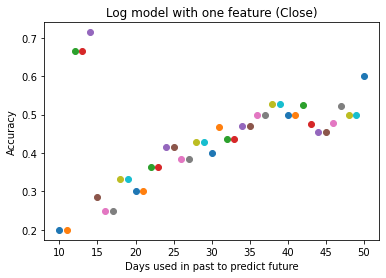

In [173]:
list_one_feature = []
for i in range(10,51):
    time = i
    plt.xlabel("Days used in past to predict future")
    plt.ylabel("Accuracy")
    plt.title("Log model with one feature (Close)")
    plt.scatter(i,log_model(apple_df,time))
    list_one_feature.append(log_model(apple_df,time))

print(f"The average accuracy for the model with one feature is {np.mean(list_one_feature)}")

The average accuracy for the model with many features is 0.41997109692515633


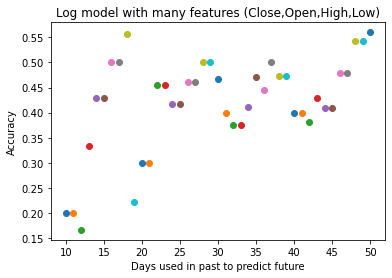

In [174]:
list_many_feature = []
for i in range(10,51):
    time = i
    plt.scatter(i,log_model_two(apple_df,time))
    plt.xlabel("Days used in past to predict future")
    plt.ylabel("Accuracy")
    plt.title("Log model with many features (Close,Open,High,Low)")
    list_many_feature.append(log_model_two(apple_df,time))


print(f"The average accuracy for the model with many features is {np.mean(list_many_feature)}")

In [165]:
one_feature = np.mean(list_one_feature)
many_features = np.mean(list_many_feature)